In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json 
from math import e
import statsmodels.api as sm

from IPython.display import display
from IPython.display import YouTubeVideo
from IPython.display import clear_output

import ipywidgets as widgets
from ipywidgets import interact

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import unidecode

#### This tables "df_pop2010 and df_IDHM" are result of preceed data engeneering, where yours original state can be found in:

* #### `df_pop2010`: https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2010.html?edicao=9666&t=resultados

* #### `df_IDHM`: https://www.undp.org/pt/brazil/idhm-municipios-2010

In [5]:
# Importing Data
df_Pop2010 = pd.read_csv('df_pop2010.csv',sep=',')
df_IDHM2010 = pd.read_csv('df_IDHM.csv')

# Treating df_IDHM
* Excluding municipality column
* Renaming columns
* Treating numerical data

In [15]:
df_IDHM2010.drop('municipio', axis=1, inplace=True)
df_IDHM2010.columns = ['Municipio', 'IDHM_2010', 'IDHM_Renda_2010', 'IDHM_Longevidade_2010',
       'IDHM_Educação_2010', 'Nome_Municipio', 'UF', 'Nome_Unico']
lst_IDHM_Renda_2010 = []
lst_IDHM_Longevidade_2010 = []
for i in (df_IDHM2010.IDHM_Renda_2010):
    lst_IDHM_Renda_2010.append(i[1:4])
for i in (df_IDHM2010.IDHM_Longevidade_2010):    
    lst_IDHM_Longevidade_2010.append(i[1:4])
df_IDHM2010['IDHM_Renda_2010'] = lst_IDHM_Renda_2010
df_IDHM2010['IDHM_Longevidade_2010'] = lst_IDHM_Longevidade_2010    

* ### Adding Unique Municipality Name Column to df_Pop2010
* ### Sorting by Unique Name and reindexing (for both dfs)

In [18]:
df_Pop2010['Nome_Unico'] = df_Pop2010['Nome_Municipio'] + ' ' + df_Pop2010['UF'] 
df_Pop2010['Nome_Unico'] = df_Pop2010['Nome_Unico'].apply(lambda x: unidecode.unidecode(x))
df_IDHM2010['Nome_Unico'] = df_IDHM2010['Nome_Unico'].apply(lambda x: unidecode.unidecode(x))
df_Pop2010 = df_Pop2010.sort_values('Nome_Unico').reset_index(drop=True)
df_IDHM2010 = df_IDHM2010.sort_values('Nome_Unico').reset_index(drop=True)

## Creating df_Census2010  ( equivalent of df_Brazil )

In [21]:
# Creating df_Censo2010 DataFrame
df_Censo2010 = pd.DataFrame()

# Adding Municipality Column
df_Censo2010['Municipio'] = df_IDHM2010['Municipio']

# Adding IDHM_2010 Column
df_Censo2010['IDHM_2010'] = df_IDHM2010['IDHM_2010']

# Adding IDHM_Income_2010 Column
df_Censo2010['IDHM_Renda_2010'] = df_IDHM2010['IDHM_Renda_2010']

# Adding IDHM_Longevity_2010 Column
df_Censo2010['IDHM_Longevidade_2010'] = df_IDHM2010['IDHM_Longevidade_2010']

# Adding IDHM_Education_2010 Column
df_Censo2010['IDHM_Educação_2010'] = df_IDHM2010['IDHM_Educação_2010']

# Adding Total_Population_Absolute Column
df_Censo2010['Total_Pop_Absol'] = df_Pop2010['Total_Pop_Absol']

# Adding Urban_Total_Population_Absolute Column
df_Censo2010['Total_Pop_Urbana_Absol'] = df_Pop2010['Total_Pop_Urbana_Absol']

# Adding Urban_Population_Municipal_Seat_Absolute Column
df_Censo2010['Pop_Sede_Municipal_Absol'] = df_Pop2010['Pop_Sede_Municipal_Absol']

# Adding Total_Percentage Column
df_Censo2010['Percentual_Total'] = df_Pop2010['Percentual_Total']

# Adding Urban_Population_Percentage Column
df_Censo2010['Pop_Urbana_Percentual'] = df_Pop2010['Pop_Urbana_Percentual']

# Adding Municipal_Seat_Population_Percentage Column
df_Censo2010['Pop_Sede_Municpal_Percentual'] = df_Pop2010['Pop_Sede_Municpal_Percentual']

# Adding Area Column
df_Censo2010['Area'] = df_Pop2010['Area']

# Adding Demographic_Density Column
df_Censo2010['Densidade_demografica'] = df_Pop2010['Densidade_demografica']

# Adding Geographic_Unit_Code Column
df_Censo2010['Cod_Un_Geografica'] = df_Pop2010['Cod_Un_Geografica']

# Adding State_Code Column
df_Censo2010['UF'] = df_IDHM2010['UF']

# Adding Unique_Name Column
df_Censo2010['Nome_Unico'] = df_IDHM2010['Nome_Unico']

In [22]:
i = 2840
df_Censo2010[i:i+10]

,Municipio,IDHM_2010,IDHM_Renda_2010,IDHM_Longevidade_2010,IDHM_Educação_2010,Total_Pop_Absol,Total_Pop_Urbana_Absol,Pop_Sede_Municipal_Absol,Percentual_Total,Pop_Urbana_Percentual,Pop_Sede_Municpal_Percentual,Area,Densidade_demografica,Cod_Un_Geografica,UF,Nome_Unico
2840,Machadinho (RS),692,711,807,577,5510,3385,3291,100,61.43376,59.72777,334.446,16.48,4311700,RS,Machadinho RS
2841,Machado (MG),715,719,848,600,38688,32068,30598,100,82.88875,79.08912,585.958,66.03,3139003,MG,Machado MG
2842,Machados (PE),578,541,767,466,13596,8454,8454,100,62.18005,62.18005,60.036,226.46,2609105,PE,Machados PE
2843,Macieira (SC),662,675,806,533,1826,501,501,100,27.43702,27.43702,260.074,7.02,4210050,SC,Macieira SC
2844,Macuco (RJ),703,687,801,631,5269,4593,4593,100,87.17024,87.17024,77.719,67.80,3302452,RJ,Macuco RJ
2845,Macururé (BA),604,547,748,539,8073,2860,2860,100,35.42673,35.42673,2294.272,3.52,2919900,BA,Macurure BA
2846,Madalena (CE),610,536,778,545,18088,8915,6174,100,49.28682,34.13313,1026.256,17.63,2307635,CE,Madalena CE
2847,Madeiro (PI),563,472,772,489,7816,3364,3364,100,43.03992,43.03992,177.152,44.12,2205854,PI,Madeiro PI
2848,Madre de Deus (BA),708,670,794,667,17376,16854,16854,100,96.99586,96.99586,32.203,539.58,2919926,BA,Madre de Deus BA
2849,Madre de Deus de Minas (MG),699,667,856,598,4904,3732,3732,100,76.10114,76.10114,492.909,9.95,3139102,MG,Madre de Deus de Minas MG


In [23]:
df_Censo2010[df_Censo2010.UF == 'AM'].sort_values('Total_Pop_Absol')

,Municipio,IDHM_2010,IDHM_Renda_2010,IDHM_Longevidade_2010,IDHM_Educação_2010,Total_Pop_Absol,Total_Pop_Urbana_Absol,Pop_Sede_Municipal_Absol,Percentual_Total,Pop_Urbana_Percentual,Pop_Sede_Municpal_Percentual,Area,Densidade_demografica,Cod_Un_Geografica,UF,Nome_Unico
2528,Japurá (AM),522,552,748,345,7326,3298,3298,100,45.01775,45.01775,55791.877,0.13,1302108,AM,Japura AM
2335,Itamarati (AM),477,529,772,266,8038,4472,4472,100,55.63573,55.63573,25275.968,0.32,1301951,AM,Itamarati AM
2378,Itapiranga (AM),654,594,792,594,8211,6451,6451,100,78.56534,78.56534,4231.145,1.94,1302009,AM,Itapiranga AM
5047,Silves (AM),632,546,791,584,8444,4029,4029,100,47.71435,47.71435,3748.826,2.25,1304005,AM,Silves AM
195,Amaturá (AM),560,499,773,455,9467,4960,4960,100,52.39252,52.39252,4758.748,1.99,1300060,AM,Amatura AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,Coari (AM),586,606,780,425,75965,49651,49651,100,65.36036,65.36036,57921.914,1.31,1301209,AM,Coari AM
2879,Manacapuru (AM),614,604,795,481,85141,60174,60174,100,70.67570,70.67570,7330.066,11.62,1302504,AM,Manacapuru AM
2299,Itacoatiara (AM),644,618,811,534,86839,58157,57961,100,66.97106,66.74536,8892.021,9.77,1301902,AM,Itacoatiara AM
3611,Parintins (AM),658,589,800,605,102033,69890,67655,100,68.49745,66.30698,5952.378,17.14,1303403,AM,Parintins AM


# Adding Macroregions

In [24]:
# Dictionary mapping state abbreviations to macroregions
regioes = {
    'RS': 'Sul',
    'SC': 'Sul',
    'PR': 'Sul',
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'MT': 'Centro_oeste',
    'MS': 'Centro_oeste',
    'DF': 'Centro_oeste',
    'GO': 'Centro_oeste',
    'AC': 'Norte',
    'AM': 'Norte',
    'AP': 'Norte',
    'PA': 'Norte',
    'RO': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'AL': 'Nordeste',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RN': 'Nordeste',
    'SE': 'Nordeste'
}

# Adding the 'Macroregion' column to the DataFrame df_Censo2010
df_Censo2010['Macroregioes'] = df_Censo2010['UF'].map(regioes)

In [25]:
df_Censo2010

,Municipio,IDHM_2010,IDHM_Renda_2010,IDHM_Longevidade_2010,IDHM_Educação_2010,Total_Pop_Absol,Total_Pop_Urbana_Absol,Pop_Sede_Municipal_Absol,Percentual_Total,Pop_Urbana_Percentual,Pop_Sede_Municpal_Percentual,Area,Densidade_demografica,Cod_Un_Geografica,UF,Nome_Unico,Macroregioes
0,Abadia de Goiás (GO),708,687,830,622,6876,5081,5081,100,73.89471,73.89471,146.778,46.85,5200050,GO,Abadia de Goias GO,Centro_oeste
1,Abadia dos Dourados (MG),689,693,839,563,6704,4189,4189,100,62.48508,62.48508,881.063,7.61,3100104,MG,Abadia dos Dourados MG,Sudeste
2,Abadiânia (GO),689,671,841,579,15757,10778,10464,100,68.40135,66.40858,1045.126,15.08,5200100,GO,Abadiania GO,Centro_oeste
3,Abaeté (MG),698,720,848,556,22690,19704,19642,100,86.84002,86.56677,1817.066,12.49,3100203,MG,Abaete MG,Sudeste
4,Abaetetuba (PA),628,579,798,537,141100,82998,80804,100,58.82211,57.26719,1610.603,87.61,1500107,PA,Abaetetuba PA,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,Xique-Xique (BA),585,563,741,479,45536,32541,31302,100,71.46214,68.74122,5502.297,8.28,2933604,BA,Xique-Xique BA,Nordeste
5561,Zabelê (PB),623,567,725,587,2075,1472,1472,100,70.93976,70.93976,109.394,18.97,2517407,PB,Zabele PB,NaN
5562,Zacarias (SP),729,695,826,674,2335,1836,1830,100,78.62955,78.37259,319.139,7.32,3557154,SP,Zacarias SP,Sudeste
5563,Zé Doca (MA),595,559,745,505,50173,30864,30864,100,61.51516,61.51516,2416.053,20.77,2114007,MA,Ze Doca MA,Nordeste


# DataFrame functioning test:

In [26]:
def plota_Censo2010(axis_x,axis_y,trendline,cor):
    df = df_Censo2010
    if trendline == 'log':
        tipo_de_ajuste = dict(log_x=True, log_y = True)
    elif trendline == 'reta':
        tipo_de_ajuste = dict(log_x=False)
    fig = px.scatter(data_frame=df, x=axis_x, y=axis_y, marginal_x="box", marginal_y="box", 
                     trendline="ols", trendline_options=tipo_de_ajuste, trendline_color_override="red",
                     template="simple_white", hover_name='Municipio', log_x = True, log_y = True,
                     color = cor, height=500, width=1000, color_discrete_sequence=['#82361d','#c944a2','#7e8af2'])
    fig.show()
    
#     # Save in SVG and PNG
#     pio.write_image(fig, "ScatterPlot_South_ByColors.svg", format="svg")
#     pio.write_image(fig, "ScatterPlot_South_ByColors.png", format="png", scale=3)  # Adjust 'scale' for disere good quality picture
    

eixo_x = widgets.Dropdown(options = df_Censo2010.columns, value='Total_Pop_Absol', description = 'eixo x')
eixo_y = widgets.Dropdown(options = df_Censo2010.columns, value='IDHM_2010', description = 'eixo y')

interact(plota_Censo2010, axis_x=eixo_x, axis_y=eixo_y, trendline=['log','reta'],cor =['Macroregioes','UF'])

interactive(children=(Dropdown(description='eixo x', index=5, options=('Municipio', 'IDHM_2010', 'IDHM_Renda_2…

<function __main__.plota_Censo2010(axis_x, axis_y, trendline, cor)>

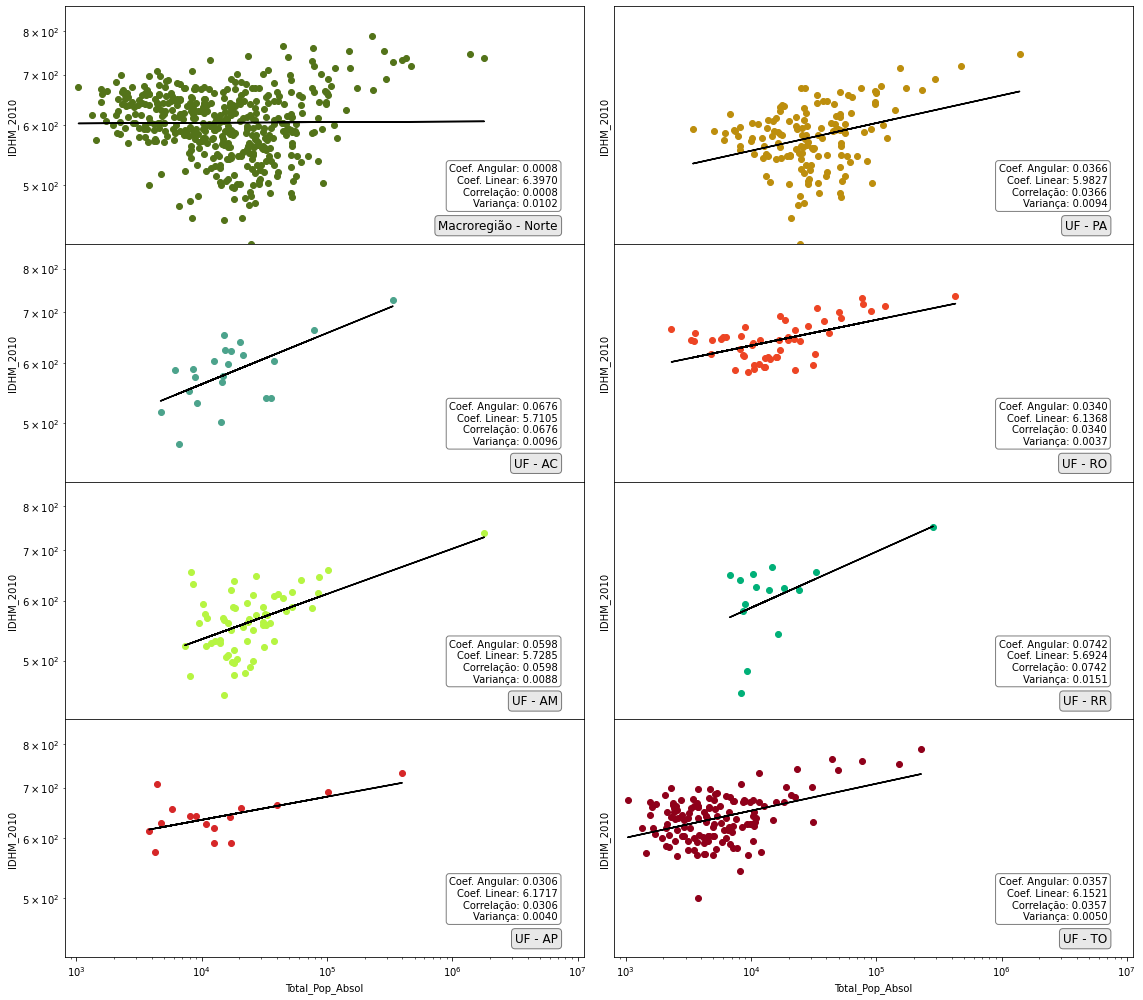

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib import ticker

def plot_Census2010_With_Trendline_subplot(ax, data, axis_x, axis_y, color, title, x_limits, y_limits):
    # Calculate OLS manually
    x = data[axis_x]
    y = data[axis_y]
    slope, intercept = np.polyfit(np.log(x), np.log(y), 1)

    # Add OLS trendline to the plot in black
    trendline_y = np.exp(np.log(x) * slope + intercept)
    ax.scatter(x, y, color=color, label='Data')
    ax.plot(x, trendline_y, color='black', label='Trendline')

    # Calculate additional information
    correlation, _ = linregress(np.log(x), np.log(y))[:2]
    variance = np.var(np.log(y))
    
    # Add information to the bottom right
    info_text = f'Slope: {slope:.4f}\nIntercept: {intercept:.4f}\nCorrelation: {correlation:.4f}\nVariance: {variance:.4f}'
    ax.text(0.95, 0.15, info_text, transform=ax.transAxes, ha='right', va='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Add title to the bottom right
    ax.text(0.95, 0.05, title, transform=ax.transAxes, ha='right', va='bottom', fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

    # Subplot settings
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xlabel(axis_x)
    ax.set_ylabel(axis_y)

    # Adjusting the y-axis label format
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:g}'.format(x)))

    # Hide horizontal axes, except on the last row
    if ax != axs[-1, 0] and ax != axs[-1, 1]:
        ax.spines['bottom'].set_visible(False)

#-------------------------------------------------------------------------------------------------------------


# Define the x and y axes
x_axis = 'Total_Pop_Absol'
y_axis = 'IDHM_2010'

# Determine the global limits for the x and y axes
x_limits = [df_Censo2010[x_axis].min(), df_Censo2010[x_axis].max()]
y_limits = [df_Censo2010[y_axis].min(), df_Censo2010[y_axis].max()]

# Creating 5x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(16, 14), sharex=True, gridspec_kw={'hspace': 0})

# Adding subplot for North Macroregion
data = df_Censo2010[df_Censo2010.Macroregion == 'North']
title = 'Macroregion - North'
color = '#537319'
plot_Census2010_With_Trendline_subplot(axs[0, 0], data, x_axis, y_axis, color, title, x_limits, y_limits)

# Adding subplot for Northeast Macroregion
data = df_Censo2010[df_Censo2010.UF == 'AC']
title = 'UF - AC'
color = '#4CA38C'
plot_Census2010_With_Trendline_subplot(axs[1, 0], data, x_axis, y_axis, color, title, x_limits, y_limits)

# Adding subplot for Southeast Macroregion
data = df_Censo2010[df_Censo2010.UF == 'AM']
title = 'UF - AM'
color = '#b6f542'
plot_Census2010_With_Trendline_subplot(axs[2, 0], data, x_axis, y_axis, color, title, x_limits, y_limits)

# Adding subplot for South Macroregion
data = df_Censo2010[df_Censo2010.UF == 'AP']
title = 'UF - AP'
color = '#D62728'
plot_Census2010_With_Trendline_subplot(axs[3, 0], data, x_axis, y_axis, color, title, x_limits, y_limits)


# Adding subplot for AC State
data_ac = df_Censo2010[df_Censo2010.UF == 'PA']
title_ac = 'UF - PA'
plot_Census2010_With_Trendline_subplot(axs[0, 1], data_ac, x_axis, y_axis, '#bd8e0d', title_ac, x_limits, y_limits)
axs[0, 1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Adding subplot for AM State
data_am = df_Censo2010[df_Censo2010.UF == 'RO']
title_am = 'UF - RO'
plot_Census2010_With_Trendline_subplot(axs[1, 1], data_am, x_axis, y_axis, '#ed4524', title_am, x_limits, y_limits)
axs[1, 1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Adding subplot for RO State
data_ro = df_Censo2010[df_Censo2010.UF == 'RR']
title_ro = 'UF - RR'
plot_Census2010_With_Trendline_subplot(axs[2, 1], data_ro, x_axis, y_axis, '#00b078', title_ro, x_limits, y_limits)
axs[2, 1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Adding subplot for PA State
data_pa = df_Censo2010[df_Censo2010.UF == 'TO']
title_pa = 'UF - TO'
plot_Census2010_With_Trendline_subplot(axs[3, 1], data_pa, x_axis, y_axis, '#8f001a', title_pa, x_limits, y_limits)
axs[3, 1].

tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Save the figure in PNG and SVG format
fig.savefig('North_States.png', dpi=300, bbox_inches='tight')
fig.savefig('North_States.svg', format='svg', bbox_inches='tight')

# Adjusting layout
plt.tight_layout()
plt.show()

In [28]:
# Export .csv table (df_Censo2010 equivalent at df_Brazil)
df_Censo2010.to_csv('df_Censo2010.csv', index = False)